<a href="https://colab.research.google.com/github/Zeeshan00789/Yes-bank-closing-price-prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Submitted By:** Zeeshan Ahmad (Cohort - Flex)

---




##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

In [ ]:
#Importing all the library

import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 2/data_YesBank_StockPrices.csv")

##Data Inspection

In [ ]:
#dataset
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
#checking dataset shape
df.shape

(185, 5)

In [ ]:
#informtion of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


##Data Set Information

Date: It specifies the month and year of particular price.



Open: it specifies the opening price of the stock in that month.(Numeric)

High: it specifies the highest price of stock in that month.(Numeric)

Low: it specifies the lowest price of stock in that month.(Numeric)

Close: it specifies the close price of stock in that month.(Numeric)

In [ ]:
#unique values
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [ ]:
#checking duplicate values
df[df.duplicated()].count()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

No duplicate values

In [ ]:
#checking data description
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
#Changing the date into numbers
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

#Exploratory Data Analysis

## Plot of Close Price

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

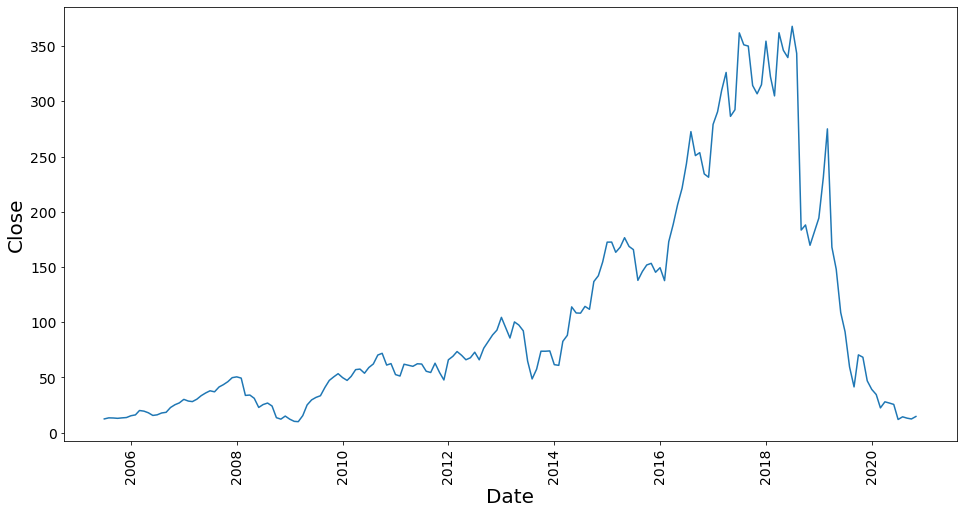

In [ ]:
#figure size
plt.figure(figsize=(16,8))

#Plotting date vs close price graph
sns.lineplot(x=df['Date'], y=df['Close'])

#labelling
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

* The above graph shows the variation of close price of yes bank stock price with respect to year. 

* We can see the peak is high in year between 2017 to 2019
* Low is in start of year 2006, 2009 and after 2020.
* There is a sudden change after year of 2014

##Plot of all the Prices against Year

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

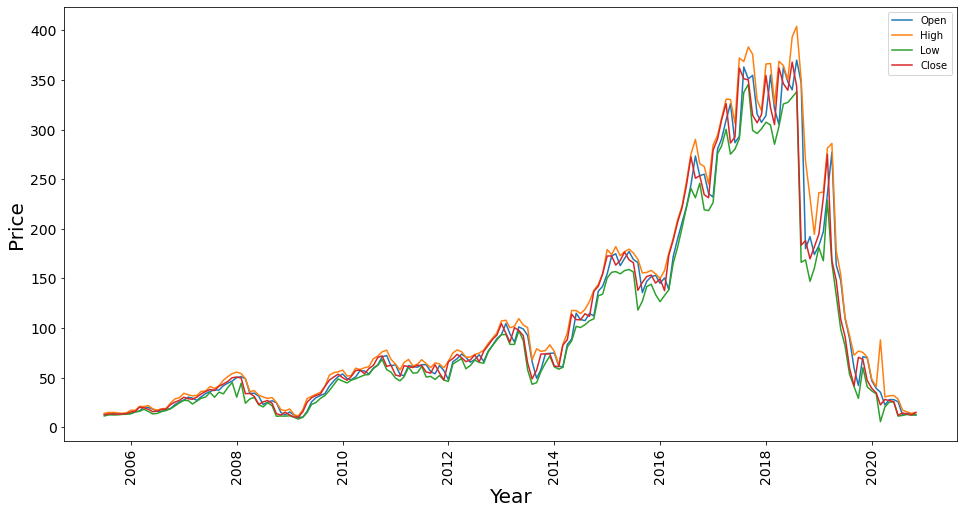

In [ ]:

#Grouping of all columns
all_plot =df.groupby(['Date']).agg({'Open':"sum",'High':"sum",'Low':"sum",'Close':"sum"})

#figure size
plt.figure(figsize=(16,8))

#plotting line graph
sns.lineplot(data=all_plot, dashes= False)

#labelling
plt.xlabel('Year', fontsize= 20)
plt.ylabel('Price', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)


* The above graph shows the variation of  opening price,high, low and close of stock price.

* All features have similar characteristics.


#

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

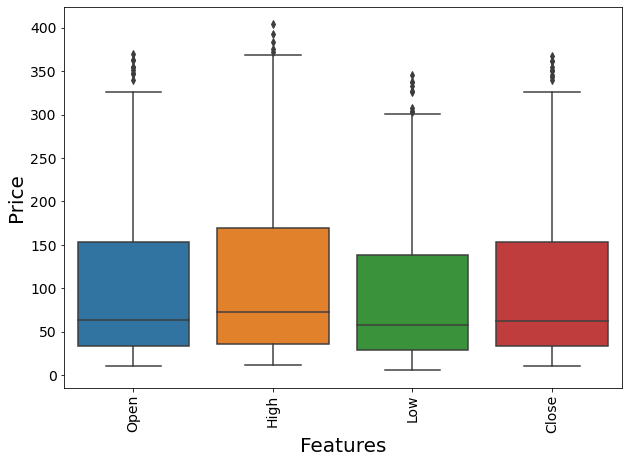

In [ ]:
#figure size
plt.figure(figsize=(10,7))

#plot
sns.boxplot(data= df)

#labelling
plt.xlabel('Features', fontsize= 20)
plt.ylabel('Price', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)


* Outliers are present in the data.
* Open and Close have very similar values.
* The median of the close price is around 60.

##Histogram of dependent variable "Close Price"

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 ]),
 <a list of 6 Text major ticklabel objects>)

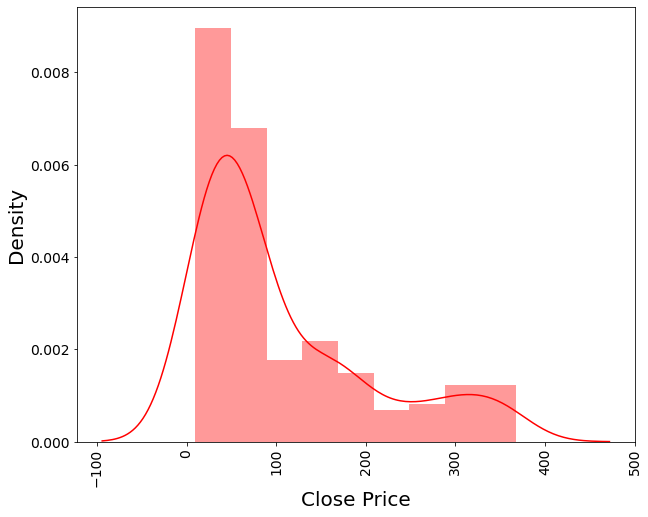

In [ ]:


#figure size
plt.figure(figsize=(10,8))

#PLotting histogram
sns.distplot(df['Close'], color= 'r')

#labelling
plt.xlabel('Close Price', fontsize= 20)
plt.ylabel('Density', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

* Above graph shows that dependent values is positively skewed. applying log transformation to data to make it normal distribution.


##Applying Log Transformation in "Close Price"

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
 <a list of 8 Text major ticklabel objects>)

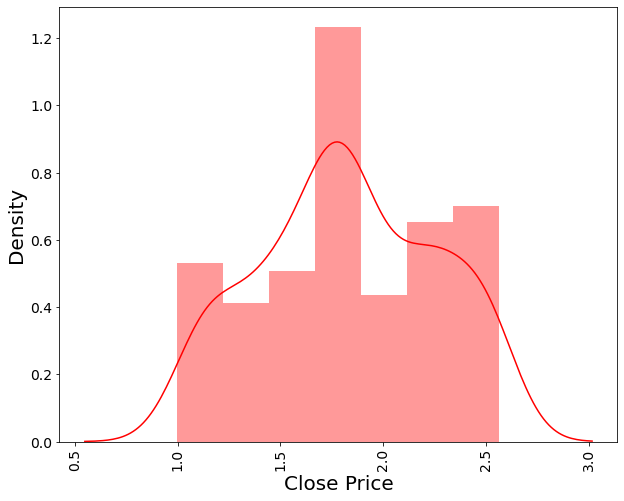

In [ ]:
#figure size
plt.figure(figsize=(10,8))

#plot after applying log 10
sns.distplot(np.log10(df['Close']), color= 'r')

#labelling
plt.xlabel('Close Price', fontsize= 20)
plt.ylabel('Density', fontsize= 20)

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

After applying log transformation. Data is normally distributed of close price.

##Histogram of Independent variable

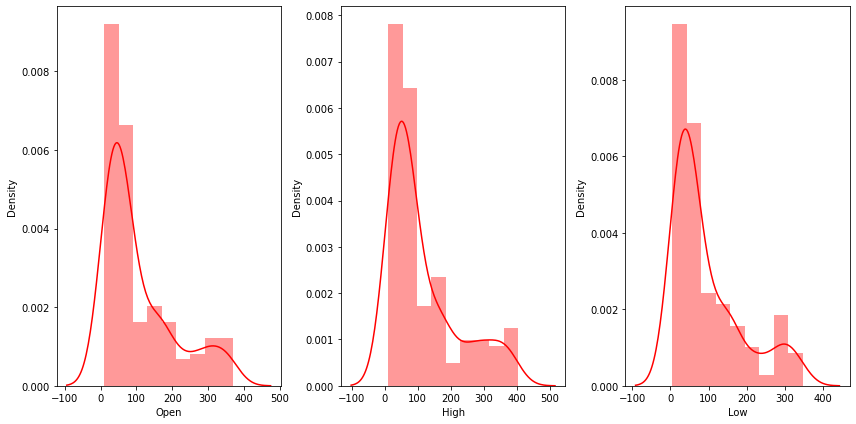

In [ ]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))

#graph plot
sns.distplot(df['Open'], color='r', ax=axs[0])
sns.distplot(df['High'], color='r', ax=axs[1])
sns.distplot(df['Low'], color='r',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

* Other features i.e. independent variable are also positvely skewed.
The above histogram shows data distribution of open, high and low.

##Applying log transformation in Independent variable

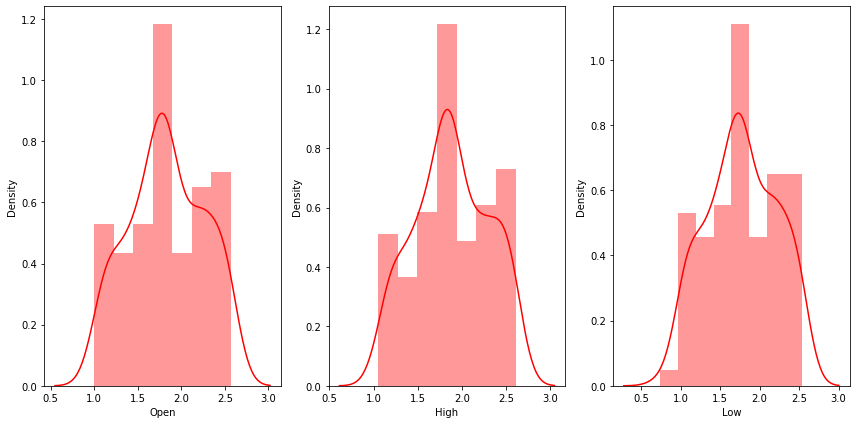

In [ ]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))

#graph plot
sns.distplot(np.log10(df['Open']), color='r', ax=axs[0])
sns.distplot(np.log10(df['High']), color='r', ax=axs[1])
sns.distplot(np.log10(df['Low']), color='r',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

The independent data is normal distributed after applying log transformation.

##Scatter Plot with best fit line

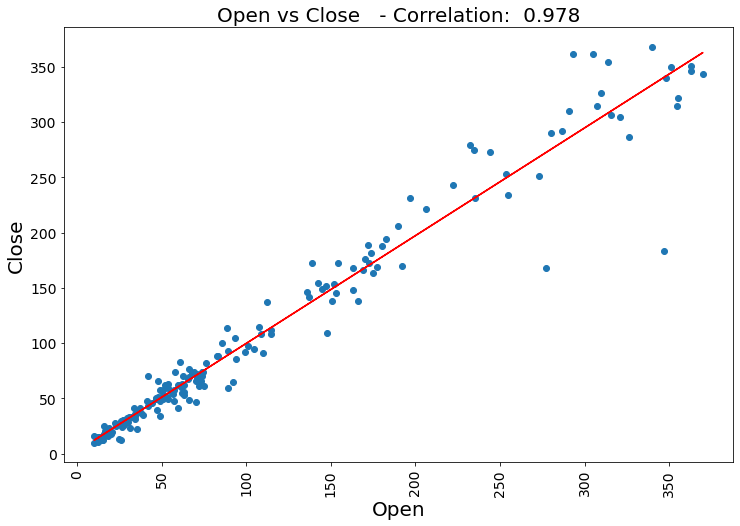

In [ ]:

stock_close=df['Close']
#correlation of Open and Close Price
correlation= df['Open'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['Open'], y= df['Close'])

#title set
ax.set_title("Open vs Close" + "   - Correlation:  " + str(round(correlation,3)), fontsize=20)

#labelling
plt.xlabel('Open', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#Font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['Open'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Open"])

plt.plot(df["Open"], y_hat, "r-", lw=1.5)

* The above scatter plot shows the variation of yes bank stock open price against closing price.

* 'open price' is linearly correlated( correlation 0.978) with the dependent variable (close price).

* Small amount of Outliers are also present.



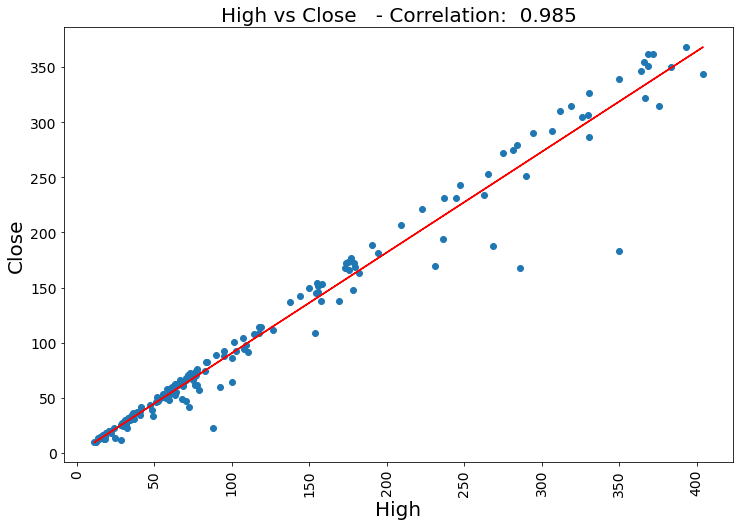

In [ ]:
stock_close=df['Close']

#correlation of High and Close Price
correlation= df['High'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['High'], y= df['Close'])

#setting title
ax.set_title("High vs Close" + "   - Correlation:  " + str(round(correlation,3)), fontsize=20)

#labelling
plt.xlabel('High', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#fontsize
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['High'], df['Close'], 1)
y_hat = np.poly1d(z)(df["High"])

plt.plot(df["High"], y_hat, "r-", lw=1.5)



The above scatter plot shows the variation of yes bank stock 'high price' against closing price. The 'High price' is linearly correlated (0.9850) with the dependent variable (close price).


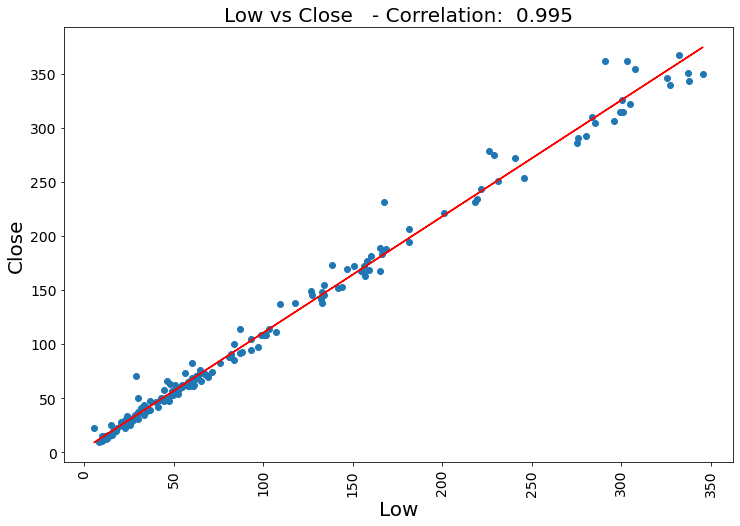

In [ ]:
stock_close=df['Close']

#correlation of Low and Close Price
correlation= df['Low'].corr(stock_close)

#figure size
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()

#scatter plot
plt.scatter(x= df['Low'], y= df['Close'])

#setting title
ax.set_title("Low vs Close" + "   - Correlation:  " + str(round(correlation,3)), fontsize=20)

#labelling
plt.xlabel('Low', fontsize= 20)
plt.ylabel('Close', fontsize= 20)

#fontsize
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#best fit line
z = np.polyfit(df['Low'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Low"])

plt.plot(df["Low"], y_hat, "r-", lw=1.5)



The above scatter plot shows the variation of yes bank stock 'low price' against 'close price'. The 'Low price' is linearly correlated (0.995) with the dependent variable (close price).

##Correlation with heat map

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

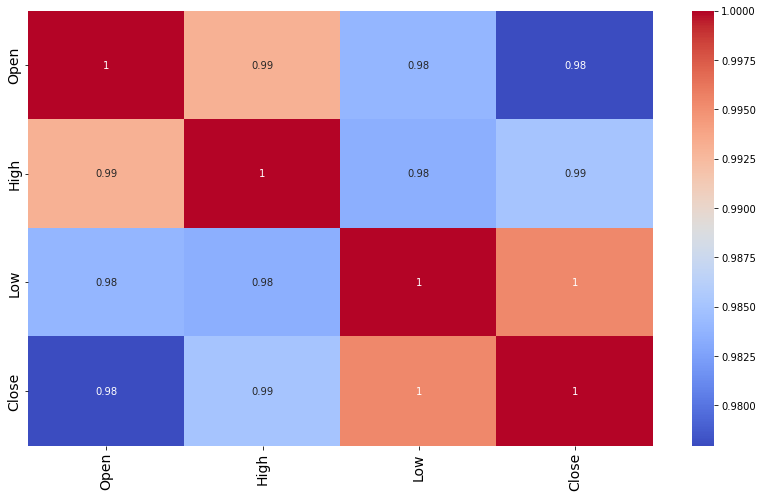

In [ ]:
#figure size of graph
plt.figure(figsize=(14,8))

#correlation
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#font size of numbers
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

* The above heatmap shows the high correlation between independent variables open,high and low with dependent variable close price.
* Data is highly correlated,multicollinearity also present. Hence finding VIF(variance inflation factor)







In [ ]:
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df.drop(columns=['Close','Date']))

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137




*   Even though we have high VIF in our dataset we can't perform feature engineering because features are important and limited.
*  All this features are required to predict close price.



#Model

##Transforming & Spliting Data

x = Independant Variable


y = Dependent Variable 

In [ ]:
# Splitting data into Dependent and Independent Variables
x = df.drop(columns=['Close','Date'])
y = df['Close']

In [ ]:
# Data transformation
from scipy.stats import zscore
x = x.apply(zscore)
y = np.log10(y)

##Train-test split

###Training set = 80% 

###Test set = 20%

In [ ]:
# Spliting Data into Testing and Training Datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [ ]:
#training data
x_train[0:10]

,Open,High,Low
59,-0.495287,-0.530001,-0.465501
73,-0.432415,-0.491716,-0.488475
120,0.643516,0.560849,0.676052
145,2.610818,2.380253,2.664784
118,0.653657,0.573863,0.690892
17,-0.812692,-0.815161,-0.775485
5,-0.933468,-0.958684,-0.900797
130,0.854444,0.875996,0.948991
122,0.304917,0.371497,0.352328
91,-0.011473,-0.078309,-0.017014


In [ ]:
#test data
x_test[0:10]

,Open,High,Low
16,-0.839058,-0.826382,-0.808462
179,-0.788862,-0.793566,-0.762844
66,-0.431604,-0.495676,-0.500787
40,-0.920285,-0.926999,-0.920034
166,0.585714,0.584141,0.418831
155,2.458707,2.206555,2.554641
97,-0.400979,-0.455410,-0.568609
177,-0.844128,-0.807711,-0.820553
35,-0.753673,-0.791020,-0.795051
54,-0.526724,-0.551878,-0.533434


In [ ]:
#shape of training dataset.
x_train.shape

(148, 3)

In [ ]:
#shape of testing dataset.
x_test.shape

(37, 3)

##1. Linear Regression

In [ ]:
#fitting Linear Regression into training set
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
#intercept value
regression.intercept_

1.8292785179315048

In [ ]:
#coefficent of line
regression.coef_

array([-0.04654099,  0.19795929,  0.23173905])

In [ ]:
#train accuracy of linear regression model
round(regression.score(x_train,y_train), 3)

0.815

In [ ]:
#test accuracy of linear regression model
round(regression.score(x_test,y_test), 3)

0.823

In [ ]:
#actual close price on test data
np.array (y_test )

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#predicted close price of test data.
y_pred = regression.predict(x_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

###Performance metrics of Linear Regression model

In [ ]:
#Performance metrics of linear regression
Train_score = round(regression.score(x_train,y_train), 3)
Test_score = round(regression.score(x_test,y_test), 3)
MSE = round(mean_squared_error(y_test, y_pred), 3)
RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),3)
MAE = round(mean_absolute_error(y_test, y_pred),3)
MAPE = round(mean_absolute_percentage_error(y_test, y_pred),3)
R2 = round(r2_score(y_test, y_pred), 3)
print('Train score :', Train_score)
print('Test score : ', Test_score)
print("Mean Squared Error :", MSE)
print("Root Mean Squared Error :", RMSE)
print("Mean Absolute Error :", MAE)
print("Mean Absolute Percentage Error :", MAPE)
print("R2 Score :", R2)


Train score : 0.815
Test score :  0.823
Mean Squared Error : 0.032
Root Mean Squared Error : 0.178
Mean Absolute Error : 0.151
Mean Absolute Percentage Error : 0.095
R2 Score : 0.823


In [ ]:
i=0
perform = pd.DataFrame()

perform.loc[i,'Model']= 'Linear regression'
perform.loc[i,"Train score"]= round(Train_score,3)
perform.loc[i,"Test score"]= round(Test_score,3)
perform.loc[i,"MSE"]=round(MSE,3)
perform.loc[i,"RMSE"]=round(RMSE,3)
perform.loc[i,"MAE"]=round(MAE,3)
perform.loc[i,"MAPE"]=round(MAPE,3)
perform.loc[i,"R2 Score"]= round(R2,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823


###Plot of Predicted Close Price against Actual Close Price of Linear Regression

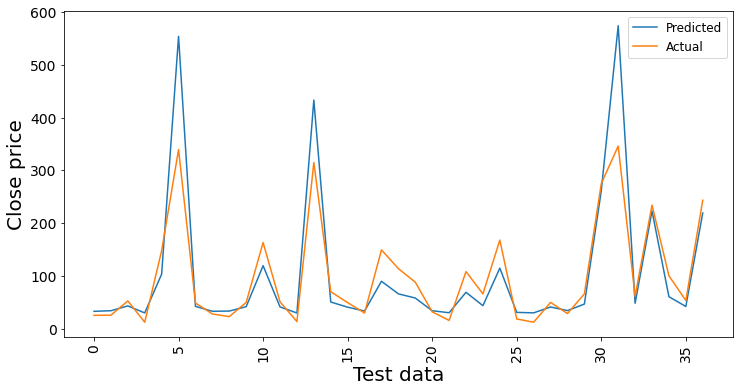

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred)
sns.lineplot(data=10**(np.array (y_test)))

#labelling
plt.xlabel('Test data', fontsize= 20)
plt.ylabel('Close price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Predicted','Actual'], fontsize = 12)

*  We can see the difference between actual price and predicted price.
*  Differences are comparitively high at peak point.

##2. Lasso Regression

In [ ]:
#fitting lasso regression to training set
lasso_reg = Lasso(alpha=0.0005, max_iter = 3000)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0005, max_iter=3000)

In [ ]:
# Accuracy of lasso regression model
round(lasso_reg.score (x_train, y_train),4)

0.8145

similar accuracy as linear regression

In [ ]:
lasso_reg.coef_

array([-0.        ,  0.16125392,  0.22184214])

In [ ]:
#predicted close price of test data.
y_pred_lasso=lasso_reg.predict(x_test)
y_pred_lasso

array([1.5168459 , 1.53225765, 1.63842894, 1.47586962, 2.01656377,
       2.7519968 , 1.62987601, 1.51717429, 1.52552322, 1.6221236 ,
       2.080486  , 1.61587578, 1.47388369, 2.63959631, 1.70561621,
       1.61170831, 1.52471639, 1.95766416, 1.81229851, 1.76283206,
       1.53234182, 1.48202489, 1.84034685, 1.63493146, 2.06096088,
       1.49104589, 1.47725162, 1.61321706, 1.53629424, 1.67221802,
       2.40705876, 2.76971786, 1.68573191, 2.35515183, 1.77961602,
       1.6245353 , 2.33700835])

In [ ]:
#actual close price on test data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Lasso Regression model

In [ ]:
#Performance metrics of linear regression
Train_score_lasso = round(lasso_reg.score(x_train,y_train), 3)
Test_score_lasso = round(lasso_reg.score(x_test,y_test), 3)
MSE_lasso = round(mean_squared_error(y_test, y_pred_lasso), 3)
RMSE_lasso = round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),3)
MAE_lasso = round(mean_absolute_error(y_test, y_pred_lasso),3)
MAPE_lasso = round(mean_absolute_percentage_error(y_test, y_pred_lasso),3)
R2_lasso = round(r2_score(y_test, y_pred_lasso), 3)
print('Train score :', Train_score_lasso)
print('Test score : ', Test_score_lasso)
print("Mean Squared Error :", MSE_lasso)
print("Root Mean Squared Error :", RMSE_lasso)
print("Mean Absolute Error :", MAE_lasso)
print("Mean Absolute Percentage Error :", MAPE_lasso)
print("R2 Score :", R2_lasso)

Train score : 0.815
Test score :  0.821
Mean Squared Error : 0.032
Root Mean Squared Error : 0.179
Mean Absolute Error : 0.152
Mean Absolute Percentage Error : 0.096
R2 Score : 0.821


In [ ]:
perform.loc[i,'Model']= 'Lasso regression'
perform.loc[i,"Train score"]= round(Train_score_lasso,3)
perform.loc[i,"Test score"]= round(Test_score_lasso,3)
perform.loc[i,"MSE"]=round(MSE_lasso,3)
perform.loc[i,"RMSE"]=round(RMSE_lasso,3)
perform.loc[i,"MAE"]=round(MAE_lasso,3)
perform.loc[i,"MAPE"]=round(MAPE_lasso,3)
perform.loc[i,"R2 Score"]= round(R2_lasso,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.815,0.821,0.032,0.179,0.152,0.096,0.821


###Plot of Predicted Close Price against Actual Close Price of Lasso Regression

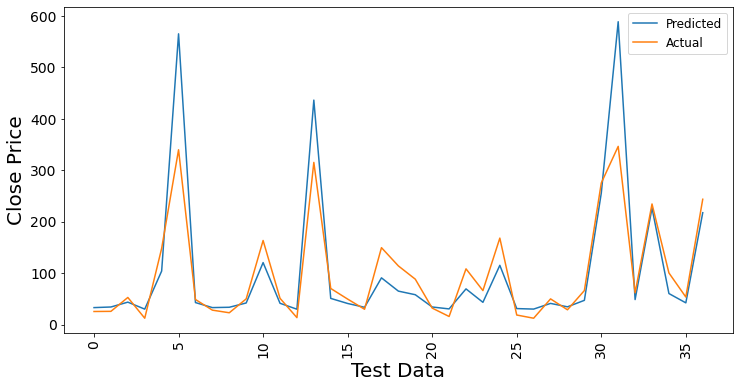

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred_lasso)
sns.lineplot(data=10**(np.array (y_test)))


#labelling
plt.xlabel('Test Data', fontsize= 20)
plt.ylabel('Close Price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

plt.legend(['Predicted','Actual'], fontsize = 12)

* The graph shows same characteristics that of a linear regression, there is a difference between actual and predicted values.
* Prediction has higher values than actual values.

##Cross Validation of Lasso Regression


In [ ]:
# Hyper parameter of Tuning For Lasso Regression
lasso_cross=Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso_cross, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(x_train, y_train)


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
#best fit alpha value
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.01
 The negative mean squared error is :  -0.0352


In [ ]:
#predicted close price of test data.
y_pred_lasso1 = lasso_regressor.predict(x_test)
y_pred_lasso1

array([1.5246758 , 1.53967822, 1.64330447, 1.48473667, 2.01244712,
       2.7285637 , 1.63520241, 1.52506422, 1.53318726, 1.62734999,
       2.07429343, 1.62111986, 1.48267825, 2.61894213, 1.7086131 ,
       1.61716593, 1.53236729, 1.9545761 , 1.81309013, 1.76452438,
       1.53980312, 1.49069997, 1.84005176, 1.64003515, 2.05511403,
       1.49942522, 1.48609019, 1.6186234 , 1.54359818, 1.67617522,
       2.39311476, 2.74618564, 1.68942791, 2.34233898, 1.78097189,
       1.62960909, 2.32426455])

In [ ]:
#actual close price on test data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Lasso Regression after Validation

In [ ]:
#Performance metrics of lasso regression after validation

MSE_lasso1 = round(mean_squared_error(y_test, y_pred_lasso1), 3)
RMSE_lasso1 = round(math.sqrt(mean_squared_error(y_test, y_pred_lasso1)),3)
MAE_lasso1 = round(mean_absolute_error(y_test, y_pred_lasso1),3)
MAPE_lasso1 = round(mean_absolute_percentage_error(y_test, y_pred_lasso1),3)
R2_lasso1 = round(r2_score(y_test, y_pred_lasso1), 3)
print("Mean Squared Error :", MSE_lasso1)
print("Root Mean Squared Error :", RMSE_lasso1)
print("Mean Absolute Error :", MAE_lasso1)
print("Mean Absolute Percentage Error :", MAPE_lasso1)
print("R2 Score :", R2_lasso1)

Mean Squared Error : 0.032
Root Mean Squared Error : 0.18
Mean Absolute Error : 0.153
Mean Absolute Percentage Error : 0.097
R2 Score : 0.819


In [ ]:
perform.loc[i,'Model']= 'Lasso after validation'

perform.loc[i,"MSE"]=round(MSE_lasso1,3)
perform.loc[i,"RMSE"]=round(RMSE_lasso1,3)
perform.loc[i,"MAE"]=round(MAE_lasso1,3)
perform.loc[i,"MAPE"]=round(MAPE_lasso1,3)
perform.loc[i,"R2 Score"]= round(R2_lasso1,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.815,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819


###Plot of Predicted Close Price against Actual Close Price of Lasso Regression after Validation

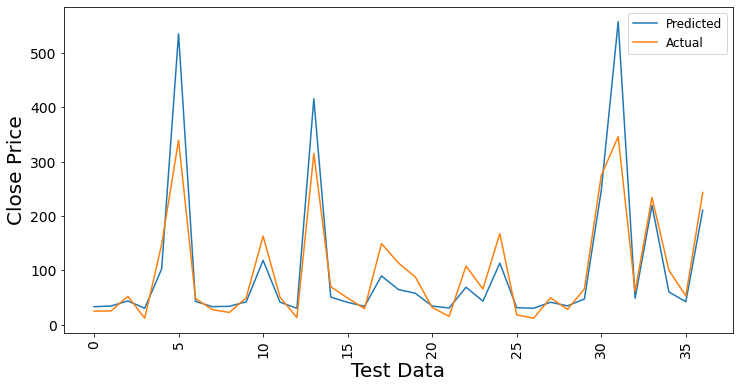

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred_lasso1)
sns.lineplot(data=10**(np.array (y_test)))


#labelling
plt.xlabel('Test Data', fontsize= 20)
plt.ylabel('Close Price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#legends
plt.legend(['Predicted','Actual'], fontsize = 12)

* After applying cross validation have not much effect on prediction
* At peak, predicted values are higher than actual value.

##3. Ridge regression

In [ ]:
# fit ridge regression into training set
from sklearn.linear_model import Ridge

ridge_reg = Ridge (alpha= 0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Accuracy of Ridge regression model
round(ridge_reg.score(x_train, y_train), 4)

0.8147

In [ ]:
# predicted close price on test data
y_pred_ridge = ridge_reg.predict(x_test)
y_pred_ridge

array([1.51725986, 1.53215164, 1.63600352, 1.47552735, 2.01524649,
       2.74546591, 1.6270459 , 1.51820847, 1.52403533, 1.62122179,
       2.07792883, 1.61563413, 1.47313494, 2.63727671, 1.7042382 ,
       1.61066104, 1.5249501 , 1.95487086, 1.81790128, 1.76386063,
       1.53181029, 1.48079356, 1.8391624 , 1.63839195, 2.06005015,
       1.49026998, 1.47689613, 1.61381392, 1.53558533, 1.66974486,
       2.41507786, 2.76158664, 1.68339463, 2.35025992, 1.78185548,
       1.62422136, 2.33989198])

In [ ]:
#actual close price on test data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Ridge Regression

In [ ]:
# Test Performance
Train_score_ridge = round(ridge_reg.score(x_train,y_train), 3)
Test_score_ridge = round(ridge_reg.score(x_test,y_test), 3)
MSE_ridge = round(mean_squared_error(y_test, y_pred_ridge), 3)
RMSE_ridge = round(math.sqrt(mean_squared_error(y_test, y_pred_ridge)),3)
MAE_ridge = round(mean_absolute_error(y_test, y_pred_ridge),3)
MAPE_ridge = round(mean_absolute_percentage_error(y_test, y_pred_ridge),3)
R2_ridge = round(r2_score(y_test, y_pred_ridge), 3)
print('Train score :', Train_score_ridge)
print('Test score : ', Test_score_ridge)
print("Mean Squared Error :", MSE_ridge)
print("Root Mean Squared Error :", RMSE_ridge)
print("Mean Absolute Error :", MAE_ridge)
print("Mean Absolute Percentage Error :", MAPE_ridge)
print("R2 Score :", R2_ridge)

Train score : 0.815
Test score :  0.822
Mean Squared Error : 0.032
Root Mean Squared Error : 0.178
Mean Absolute Error : 0.151
Mean Absolute Percentage Error : 0.095
R2 Score : 0.822


In [ ]:
perform.loc[i,'Model']= 'Ridge regression'
perform.loc[i,"Train score"]= round(Train_score_ridge,3)
perform.loc[i,"Test score"]= round(Test_score_ridge,3)
perform.loc[i,"MSE"]=round(MSE_ridge,3)
perform.loc[i,"RMSE"]=round(RMSE_ridge,3)
perform.loc[i,"MAE"]=round(MAE_ridge,3)
perform.loc[i,"MAPE"]=round(MAPE_ridge,3)
perform.loc[i,"R2 Score"]= round(R2_ridge,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.815,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822


###Plot of Predicted Close Price against Actual Close Price of Ridge regression

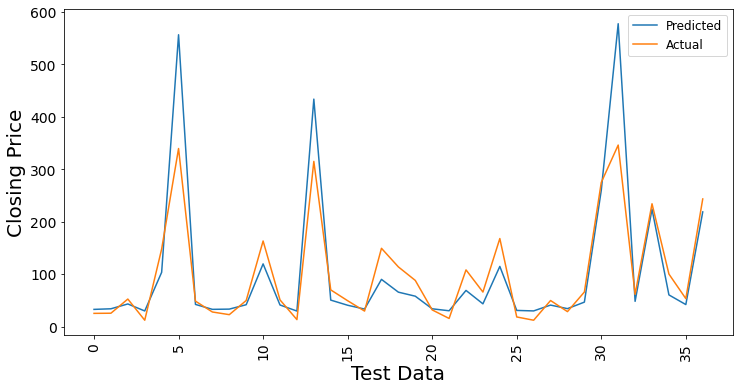

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred_ridge)
sns.lineplot(data=10**(np.array (y_test)))

#labelling
plt.xlabel('Test Data', fontsize= 20)
plt.ylabel('Closing Price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#legends
plt.legend(['Predicted','Actual'], fontsize = 12)

In ridge regression also values are not predicted correctly.
* At peak, prediction have higher values than actual values.
* Charateristics is similar as in linear and lasso regression.

##Cross validation on Ridge Regression


In [ ]:
# Hyperparameter tunning
ridge_cross = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge_cross, parameters, scoring = 'neg_mean_squared_error', cv=3)


In [ ]:
#data fitting
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
#print best fit values of alpha
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative mean squared error for is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 10
 The negative mean squared error for is : -0.035


In [ ]:
# Prediction on test data
y_pred_ridge1 = ridge_regressor.predict(x_test)
y_pred_ridge1

array([1.52133054, 1.53728128, 1.64940763, 1.4839079 , 2.02368702,
       2.73378721, 1.64726711, 1.5213362 , 1.53624874, 1.6280259 ,
       2.07922307, 1.61714065, 1.48054103, 2.61189076, 1.70753952,
       1.61769429, 1.52987123, 1.96119864, 1.80123808, 1.75900482,
       1.53947926, 1.49160849, 1.83960113, 1.63228305, 2.05254637,
       1.49759728, 1.48541775, 1.61420655, 1.54258389, 1.68083452,
       2.37546978, 2.76285145, 1.69521298, 2.35812164, 1.77364892,
       1.62674463, 2.3102558 ])

In [ ]:
# test data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of Ridge Regression after Validation

In [ ]:
# Test Performance
MSE_ridge1 = round(mean_squared_error(y_test, y_pred_ridge1), 3)
RMSE_ridge1 = round(math.sqrt(mean_squared_error(y_test, y_pred_ridge1)),3)
MAE_ridge1 = round(mean_absolute_error(y_test, y_pred_ridge1),3)
MAPE_ridge1 = round(mean_absolute_percentage_error(y_test, y_pred_ridge1),3)
R2_ridge1 = round(r2_score(y_test, y_pred_ridge1), 3)
print("Mean Squared Error :", MSE_ridge1)
print("Root Mean Squared Error :", RMSE_ridge1)
print("Mean Absolute Error :", MAE_ridge1)
print("Mean Absolute Percentage Error :", MAPE_ridge1)
print("R2 Score :", R2_ridge1)

Mean Squared Error : 0.033
Root Mean Squared Error : 0.18
Mean Absolute Error : 0.153
Mean Absolute Percentage Error : 0.097
R2 Score : 0.817


In [ ]:
#adding performance values to table
perform.loc[i,'Model']= 'Ridge after validation'

perform.loc[i,"MSE"]=round(MSE_ridge,3)
perform.loc[i,"RMSE"]=round(RMSE_ridge,3)
perform.loc[i,"MAE"]=round(MAE_ridge,3)
perform.loc[i,"MAPE"]=round(MAPE_ridge,3)
perform.loc[i,"R2 Score"]= round(R2_ridge,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.815,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822
4,Ridge after validation,NaN,NaN,0.032,0.178,0.151,0.095,0.822


###Plot of Predicted Close Price against Actual Close Price of Ridge Regression after validation

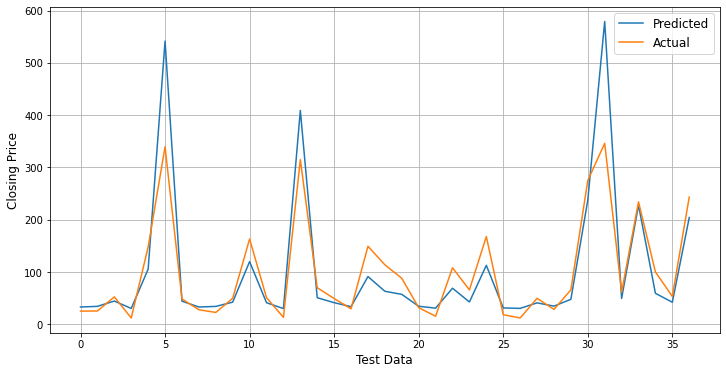

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
plt.plot(10**(y_pred_ridge1))
plt.plot(10**(np.array(y_test)))

#legend
plt.legend(['Predicted','Actual'], fontsize = 12)

#labels
plt.xlabel('Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid()

After applying cross validtion also have not much effect on prediciton

##4. Random Forest Regression

In [ ]:

rf_model = RandomForestRegressor()

#model fitting
rf_model.fit(x_train,y_train)

#prediction
y_pred_rf= rf_model.predict(x_test)
y_pred_rf

array([1.37259085, 1.45706385, 1.74983697, 1.14225819, 2.20885094,
       2.53678481, 1.6979709 , 1.39298291, 1.45212357, 1.71541912,
       2.23391568, 1.69379724, 1.11345068, 2.49671895, 1.85341525,
       1.6997178 , 1.43014234, 2.15641705, 1.98675004, 1.94443333,
       1.47195386, 1.19521458, 2.02837032, 1.73899382, 2.23094962,
       1.27829268, 1.14875842, 1.70714528, 1.48182327, 1.81137641,
       2.42520496, 2.53308798, 1.84682862, 2.3904366 , 1.94483682,
       1.74034018, 2.37976776])

###Performance Metrics of Random Forest Regression

In [ ]:
# Test Performance
Train_score_rf = round(rf_model.score(x_train,y_train), 3)
Test_score_rf = round(rf_model.score(x_test,y_test), 3)
MSE_rf = round(mean_squared_error(y_test, y_pred_rf), 3)
RMSE_rf = round(math.sqrt(mean_squared_error(y_test, y_pred_rf)),3)
MAE_rf = round(mean_absolute_error(y_test, y_pred_rf),3)
MAPE_rf = round(mean_absolute_percentage_error(y_test, y_pred_rf),3)
R2_rf = round(r2_score(y_test, y_pred_rf), 3)
print('Train score :', Train_score_rf)
print('Test score : ', Test_score_rf)
print("Mean Squared Error :", MSE_rf)
print("Root Mean Squared Error :", RMSE_rf)
print("Mean Absolute Error :", MAE_rf)
print("Mean Absolute Percentage Error :", MAPE_rf)
print("R2 Score :", R2_rf)

Train score : 0.998
Test score :  0.993
Mean Squared Error : 0.001
Root Mean Squared Error : 0.036
Mean Absolute Error : 0.027
Mean Absolute Percentage Error : 0.017
R2 Score : 0.993


In [ ]:
perform.loc[i,'Model']= 'Random Forest'
perform.loc[i,"Train score"]= round(Train_score_rf,3)
perform.loc[i,"Test score"]= round(Test_score_rf,3)
perform.loc[i,"MSE"]=round(MSE_rf,3)
perform.loc[i,"RMSE"]=round(RMSE_rf,3)
perform.loc[i,"MAE"]=round(MAE_rf,3)
perform.loc[i,"MAPE"]=round(MAPE_rf,3)
perform.loc[i,"R2 Score"]= round(R2_rf,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.815,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822
4,Ridge after validation,NaN,NaN,0.032,0.178,0.151,0.095,0.822
5,Random Forest,0.998,0.993,0.001,0.036,0.027,0.017,0.993


###Plot of Predicted Close Price against Actual Close Price of Random Forest Regression

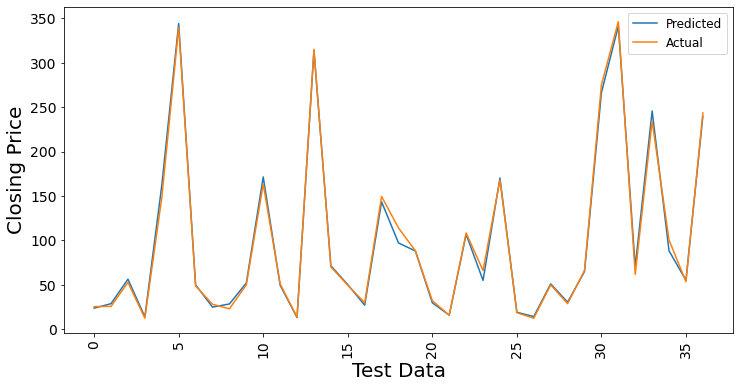

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred_rf)
sns.lineplot(data=10**(np.array (y_test)))

#labelling
plt.xlabel('Test Data', fontsize= 20)
plt.ylabel('Closing Price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#legends
plt.legend(['Predicted','Actual'], fontsize = 12)

* Random forest gives better performance.
* Prediction values approximately equal to actual values.
* Accuracy is higher than other models.

##5. XG Boost Regression

In [ ]:

xgb = XGBRegressor()

#fitting data
xgb.fit(x_train,y_train)

[02:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
#predicting data
y_pred_xgb= xgb.predict(x_test)
y_pred_xgb

array([1.3240345, 1.4481571, 1.7491498, 1.1570746, 2.1957493, 2.5145776,
       1.6748834, 1.402919 , 1.4481571, 1.7121533, 2.2350554, 1.7019634,
       1.097817 , 2.5032344, 1.8511137, 1.6865689, 1.443876 , 2.142931 ,
       2.006299 , 1.9523453, 1.4481571, 1.1984308, 2.025753 , 1.7286012,
       2.2308073, 1.2921474, 1.1570746, 1.7182921, 1.4809968, 1.7896991,
       2.4235322, 2.5344093, 1.8577319, 2.3706326, 1.9546288, 1.7555296,
       2.3739333], dtype=float32)

In [ ]:
#actual data
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

###Performance Metrics of XG Boost Regression

In [ ]:
# Test Performance
Train_score_xgb = round(xgb.score(x_train,y_train), 3)
Test_score_xgb = round(xgb.score(x_test,y_test), 3)
MSE_xgb = round(mean_squared_error(y_test, y_pred_xgb), 3)
RMSE_xgb = round(math.sqrt(mean_squared_error(y_test, y_pred_xgb)),3)
MAE_xgb = round(mean_absolute_error(y_test, y_pred_xgb),3)
MAPE_xgb = round(mean_absolute_percentage_error(y_test, y_pred_xgb),3)
R2_xgb = round(r2_score(y_test, y_pred_xgb), 3)
print('Train score :', Train_score_xgb)
print('Test score : ', Test_score_xgb)
print("Mean Squared Error :", MSE_xgb)
print("Root Mean Squared Error :", RMSE_xgb)
print("Mean Absolute Error :", MAE_xgb)
print("Mean Absolute Percentage Error :", MAPE_xgb)
print("R2 Score :", R2_xgb)

Train score : 0.999
Test score :  0.991
Mean Squared Error : 0.002
Root Mean Squared Error : 0.039
Mean Absolute Error : 0.03
Mean Absolute Percentage Error : 0.02
R2 Score : 0.991


In [ ]:
#adding values to table
perform.loc[i,'Model']= 'XG Boost'
perform.loc[i,"Train score"]= round(Train_score_xgb,3)
perform.loc[i,"Test score"]= round(Test_score_xgb,3)
perform.loc[i,"MSE"]=round(MSE_xgb,3)
perform.loc[i,"RMSE"]=round(RMSE_xgb,3)
perform.loc[i,"MAE"]=round(MAE_xgb,3)
perform.loc[i,"MAPE"]=round(MAPE_xgb,3)
perform.loc[i,"R2 Score"]= round(R2_xgb,3)

i= i+1
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.815,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822
4,Ridge after validation,NaN,NaN,0.032,0.178,0.151,0.095,0.822
5,Random Forest,0.998,0.993,0.001,0.036,0.027,0.017,0.993
6,XG Boost,0.999,0.991,0.002,0.039,0.030,0.020,0.991


###Plot of Predicted Close Price against Actual Close Price of XG Boost Regression

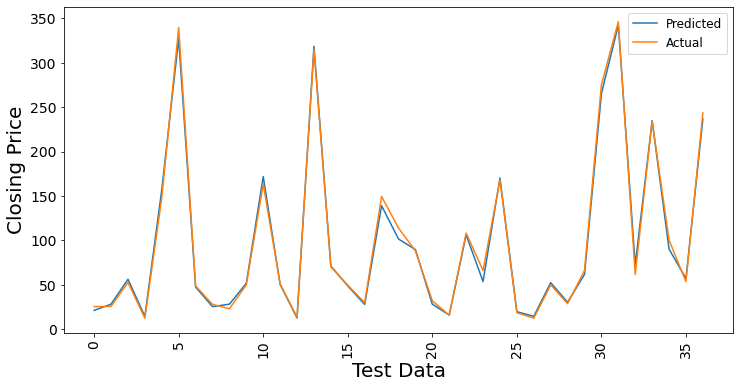

In [ ]:
#figure size
plt.figure(figsize=(12,6))

#plot
sns.lineplot(data=10**y_pred_xgb)
sns.lineplot(data=10**(np.array (y_test)))

#labelling
plt.xlabel('Test Data', fontsize= 20)
plt.ylabel('Closing Price', fontsize= 20)

#font size
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#legends
plt.legend(['Predicted','Actual'], fontsize = 12)

* Xg boost also giving better result.
* Less errors in prediction
* We can see there is a increase of accuracy in Xg boost model also

#Performance Metrics of all models

In [ ]:
perform

,Model,Train score,Test score,MSE,RMSE,MAE,MAPE,R2 Score
0,Linear regression,0.815,0.823,0.032,0.178,0.151,0.095,0.823
1,Lasso regression,0.815,0.821,0.032,0.179,0.152,0.096,0.821
2,Lasso after validation,NaN,NaN,0.032,0.180,0.153,0.097,0.819
3,Ridge regression,0.815,0.822,0.032,0.178,0.151,0.095,0.822
4,Ridge after validation,NaN,NaN,0.032,0.178,0.151,0.095,0.822
5,Random Forest,0.998,0.993,0.001,0.036,0.027,0.017,0.993
6,XG Boost,0.999,0.991,0.002,0.039,0.030,0.020,0.991


#Conclusion

* Features are multicollinear but can not drop the column because features are limited.

* High, low, open are directly correlate with the closing price of stocks.

* The test results of all the regression models are evaluated and compared. We checked performance metrics such as R2 score, Mean Scored Error, and Root Mean Score Error etc.

* In linear, lasso and ridge accuracy are approximately equal even after applying cross validation.
* Results are not up to the mark with linear regression, ridge and lasso regression.
* Other models such as random forest and Xgboost. With the help of this model we got better R2 scores and metrics.

* Out of all the model random forest and Xgboost gives best result.